В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
medical_df = pd.read_csv("drive/MyDrive/machine_learning_for_people/linear_regression/medical-charges.csv")

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
non_smoker_df.head()


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


Знайдемо лінію для прогнозу charges за age для некурців з допомогою Методу найменших квадратів (OLS) з використанням numpy

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
# Перетворення даних у numpy масиви
ages = np.array(non_smoker_df["age"])
charges = np.array(non_smoker_df["charges"])

# Додаємо колонку одиниць для bias терму
X = np.c_[np.ones((ages.shape[0], 1)), ages]

In [ ]:
X

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [ ]:
# Функція для обчислення параметрів за нормальними рівняннями
def normal_equations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
# Розрахунок коефіцієнтів моделі
theta = normal_equations(X, charges)

# Виведення коефіцієнтів прямої
print(f"Коефіцієнт при age : {theta[1]:.2f}")
print(f"Вільний член: {theta[0]:.2f}")

Коефіцієнт при age : 267.25
Вільний член: -2091.42


Вільний член (коефіцієнт theta 0) становить -2091,42, коефіцієнт при змінній Age (theta 1) становить 267.25.

In [ ]:
# Обчислення прогнозів
predictions_OLS = X.dot(theta)

# Розрахунок RMSE
rmse_OLS = np.sqrt(np.mean((charges - predictions_OLS) ** 2))
print(f"RMSE моделі: {rmse_OLS:.2f}")

RMSE моделі: 4662.51


In [ ]:
print(predictions_OLS)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score

In [ ]:
# Поглянемо на коефіцієнт R2
print(r2_score(charges, predictions_OLS))

0.3943171632425906


Значення R²=0.3943 вказує на те, що залежність між віком і витратами слабка, або що в моделі не враховані важливі фактори, які суттєво впливають на медичні збори.

Інтерпретуємо це так, що у цій лінійній моделі лише 39.43% варіації у значеннях медичних зборів пояснюється віком (age).

Значення RMSE моделі становить 4662.51

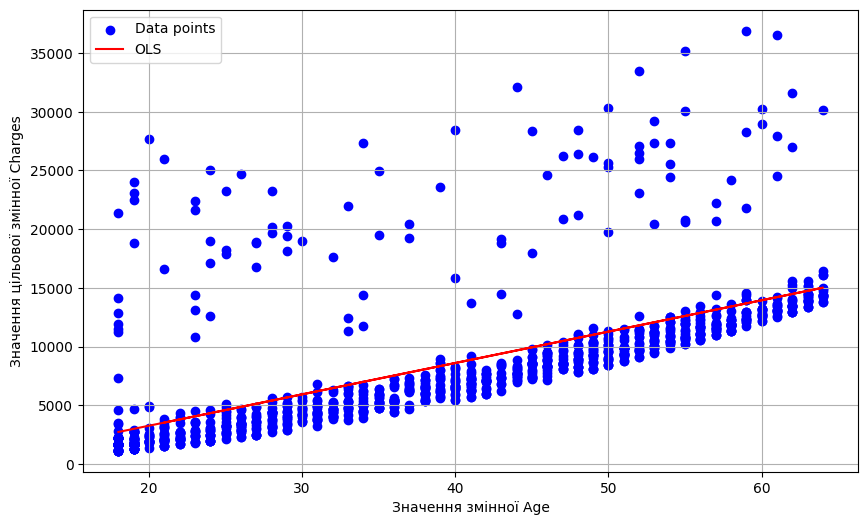

In [ ]:
# Побудова графіка
plt.figure(figsize=(10, 6))
plt.scatter(ages, charges, color="blue", label='Data points')
plt.plot(ages, predictions_OLS, color="red", label='OLS')
plt.xlabel('Значення змінної Age')
plt.ylabel('Значення цільової змінної Charges')
plt.legend()
plt.grid(True)
plt.show()

Лінія OLS має позитивний нахил, що вказує на те, що медичні збори зростають зі збільшенням віку.

Висновки:

Існує позитивна кореляція між віком пацієнта та медичними зборами.

Широкий розкид даних:

Для одного й того ж значення віку витрати значно варіюються. Це може свідчити про вплив інших факторів, наприклад, куріння, стать тощо.

Недосконалість лінійної моделі:

Лінія OLS відображає загальний тренд, але вона не враховує високий розкид даних. Для покращення прогнозу можуть знадобитися більш складні моделі, які враховують нелінійні залежності та взаємодії між змінними.


2. Знайдемо найкращу лінію для прогнозу charges за age для некурців з допомогою Full-Batch градієнтного спуску з numpy

In [ ]:
X = np.array(non_smoker_df["age"])
y = np.array(non_smoker_df["charges"])

In [ ]:
X = np.expand_dims(X, axis = 1)


In [ ]:
X

array([[18],
       [28],
       [33],
       ...,
       [18],
       [18],
       [21]])

In [ ]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient

    return m, b, errors


Протестуємо learning rate lr=0.1

In [ ]:
m, b, errors_lr = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)
predictions_fbgd = m * X[:, 0] + b
m, b, predictions_fbgd

<ipython-input-178-d68c6cd889b0>:9: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))
<ipython-input-178-d68c6cd889b0>:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))


(-4.277831608428094e+256,
 -9.631788946042329e+254,
 array([-7.70972868e+257, -1.19875603e+258, -1.41264761e+258, ...,
        -7.70972868e+257, -7.70972868e+257, -8.99307817e+257]))

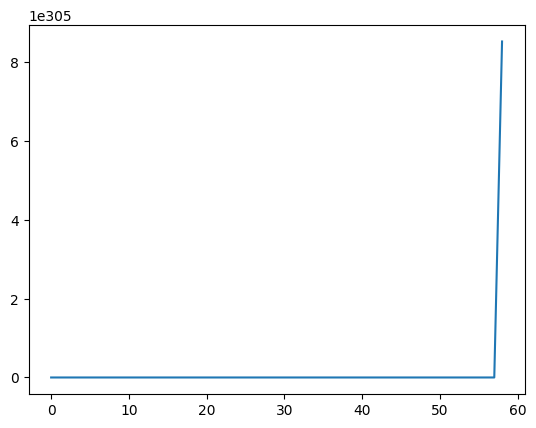

In [ ]:
#Виведемо графік помилки
plt.plot(errors_lr);

Градієнтний спуск в нашому випадку розходиться з навчальним рейтом lr=0.1, замість зменшення помилки (функції втрат) на кожній ітерації, значення помилки зростають. Значення lr занадто велике, оновлення градієнтів занадто різке і  це призводить до того, що алгоритм перестрибує оптимум і не зближується до нього. Тому зменшимо значення до lr=0.0001 і проведемо наступний експеримент.

In [ ]:
m, b, errors_lr = full_batch_gradient_descent(X, y, lr=0.0001, epochs=100)
predictions_fbgd = m * X[:, 0] + b
m, b, predictions_fbgd

(220.15455659787733,
 0.21295826871672194,
 array([3962.99497703, 6164.54054301, 7265.313326  , ..., 3962.99497703,
        3962.99497703, 4623.45864682]))

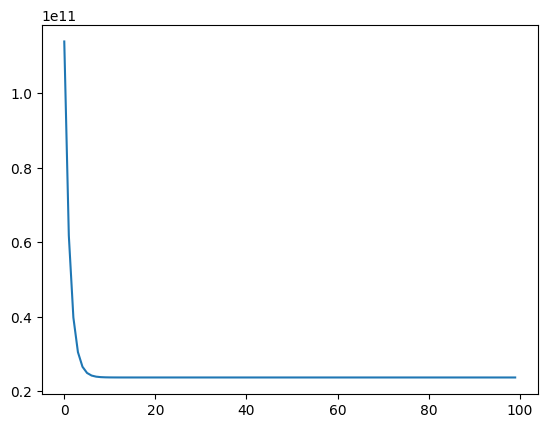

In [ ]:
plt.plot(errors_lr);

З рейтом lr=0.0001 градієнтний спуск збіжний. На графіку можемо спостерігати як помилка  зменшується, наближається до деякого мінімуму і виходить на плато, це означає, що алгоритм знайшов мінімум і припинив зміну параметрів.



Протестуємо ще одне значення рейту lr=0.00005

In [ ]:
m, b, errors_lr = full_batch_gradient_descent(X, y, lr=0.00005, epochs=100)
predictions_fbgd = m * X[:, 0] + b
m, b, predictions_fbgd

(220.10120618595232,
 2.582403131956577,
 array([3964.40411448, 6165.41617634, 7265.92220727, ..., 3964.40411448,
        3964.40411448, 4624.70773304]))

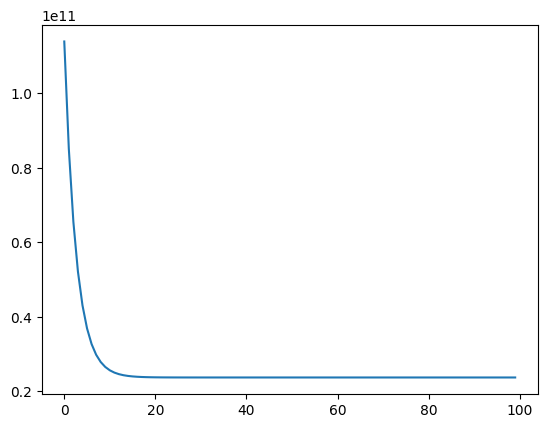

In [ ]:
plt.plot(errors_lr);

З рейтом lr=0.00005 градієнтний спуск збіжний. На графіку видно, що крива помилки зменшується більш плавно і стабільно ніж у попередньому випадку, це свідчить про те, що градієнтний спуск працює коректно.

Тому рейт lr=0.00005 є найкращим серед проведених експериметів.

In [ ]:
# Розрахуємо RMSE
rmse_fbgd = np.sqrt(np.mean((y - predictions_fbgd) ** 2))
print(f"RMSE моделі: {rmse_fbgd:.2f}")

RMSE моделі: 4715.47


Знайдемо лінію для прогнозу charges за age для некурців з допомогою scikit-learn.LinearRegression.

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [ ]:
non_smoker_age = non_smoker_df[['age']]
non_smoker_target = non_smoker_df.charges
model1.fit(non_smoker_age,non_smoker_target)
non_smoker_predictions = model1.predict(non_smoker_age)
model1.coef_, model1.intercept_


(array([267.24891283]), -2091.4205565650864)

In [ ]:
non_smoker_predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

r2 = r2_score(non_smoker_target, non_smoker_predictions)
print('R2:', r2)

rmse_lr = root_mean_squared_error(non_smoker_target, non_smoker_predictions)
print('RMSE:', rmse_lr)

R2: 0.3943171632425906
RMSE: 4662.505766636395


Коефіцієнти моделі лінійної регресії:

коефіцієнт при ознаці 267.24891283

коефіцієнт intersept -2091.4205565650864

коефіцієнт RMSE становить 4662.505766636395


Побудуємо на одному графіку дані age проти charges в вигляді діаграми розсіювання і всі три лінії регресії.

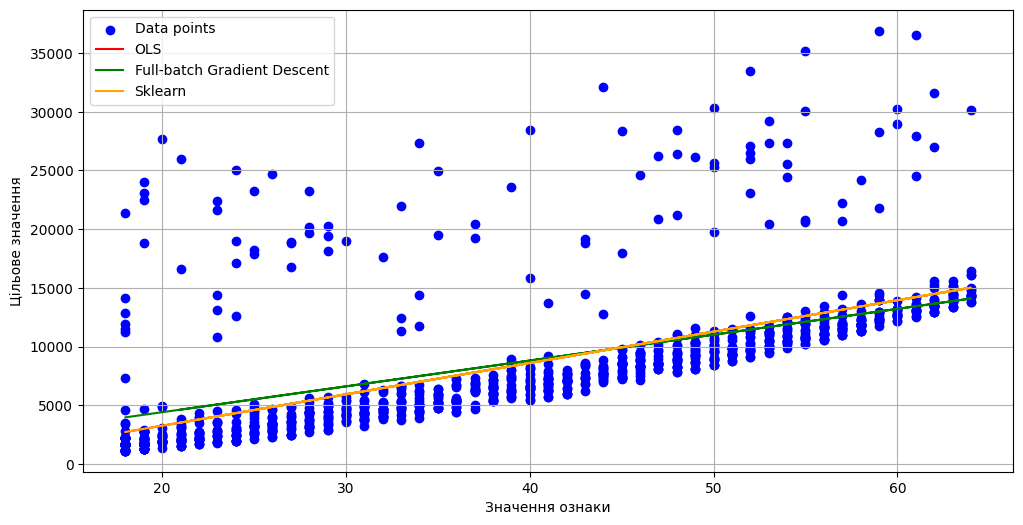

In [ ]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_OLS, color='red', label='OLS')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], non_smoker_predictions, color='orange', label='Sklearn')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Виведемо всі значення коефіцієнтів для порівняння
print('Коефіцієнти з OLS: ', theta)
print('Коефіцієнти з градієнтного. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', model1.coef_, model1.intercept_)

Коефіцієнти з OLS:  [-2091.42055657   267.24891283]
Коефіцієнти з градієнтного. спуску:  2.582403131956577 220.10120618595232
Коефіцієнти з sklearn:  [267.24891283] -2091.4205565650864


In [ ]:
#Виведемо всі значення RMSE для порівняння
print('RMSE з OLS: ', rmse_OLS)
print('RMSE з градієнтного. спуску: ', rmse_fbgd)
print('RMSE з sklearn: ', rmse_lr)

RMSE з OLS:  4662.505766636395
RMSE з градієнтного. спуску:  4715.46886823035
RMSE з sklearn:  4662.505766636395


Графік демонструє, що всі три моделі (OLS, градієнтний спуск та sklearn) загалом досить добре вловлюють лінійну залежність між ознакою та цільовою змінною. Лінії регресії, побудовані за кожною з моделей, проходять через хмару точок досить близько.

OLS та sklearn: Лінії регресії, побудовані за моделями OLS та sklearn, забезпечують ідентичні результати, оскільки sklearn використовує підхід OLS для побудови лінії регресії.

Градієнтний спуск: Лінія регресії, побудована за моделлю градієнтного спуску, також досить близька до ліній, отриманих за OLS та sklearn. Це свідчить про те, що алгоритм градієнтного спуску успішно зійшовся до оптимального рішення.


Порівняння RMSE

Чим менше значення RMSE, тим точніше модель передбачає значення цільової змінної.

Результати: RMSE для всіх трьох моделей досить близькі. Це підтверджує висновок про те, що всі моделі демонструють приблизно однакову якість прогнозування.

Порівняння коефіцієнтів:

OLS та sklearn: Коефіцієнти практично однакові, що очікувано, адже sklearn використовує метод найменших квадратів (OLS) для розрахунків.

Градієнтний спуск: Значення коефіцієнтів відрізняються від OLS та sklearn. Оскільки градієнтний спуск є ітеративним методом, результат може не досягати  точного розв’язку, для градієнтного спуску варто переглянути гіперпараметри або збільшити кількість ітерацій.


Отже, лінії регресії, побудовані за різними моделями, доволі добре відображають взаємозв’язок між ознакою та цільовою змінною. Водночас, хоча моделі показують помітний тренд, їх прогностична точність залишається обмеженою (R² = 0.394). Це вказує на те, що для більш точного прогнозування медичних зборів необхідно враховувати додаткові чинники.




 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Навчимо модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для курців за їх віком.

In [4]:
#Сформуємо наш датасет для курців
smoker_df = medical_df[medical_df.smoker == 'yes']

In [5]:
smoker_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [6]:
#Знайдемо лінію для прогнозу charges за age для курців з допомогою scikit-learn.LinearRegression.
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [7]:
smoker_age = smoker_df[['age']]
smoker_target = smoker_df.charges
model2.fit(smoker_age, smoker_target)
smoker_predictions = model2.predict(smoker_age)
model2.coef_, model2.intercept_


(array([305.23760211]), 20294.128126915966)

Коефіцієнти моделі лінійної регресії:

коефіцієнт при ознаці становить 305.23760211

коефіцієнт intersept 20294.128126915966

Виведемо значення RMSE та R2

In [9]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(smoker_target, smoker_predictions)
print('RMSE:', rmse)

r2 = r2_score(smoker_target, smoker_predictions)
print('R2:', r2)

RMSE: 10711.00334810241
R2: 0.13558924096084068


RMSE є середньоквадратичною похибкою, яка показує середню відстань між фактичними значеннями витрат і прогнозами моделі і становить в нашому випадку 10711.00.
Високе значення RMSE означає, що модель має значну похибку у своїх прогнозах.
Це може свідчити про те, що модель не враховує деякі важливі фактори, що впливають на медичні збори курців.

R2 (Коефіцієнт детермінації)становить 0.13558924096084068. Це означає, що модель пояснює лише близько 13.6% варіації в медичних зборах курців.

Низьке значення R2 вказує на те, що модель має слабку здатність до прогнозування і більшість змін у витратах пояснюється факторами, які не були враховані в цій моделі.

Висновки:
Модель погано справляється з прогнозуванням медичних зборів для курців.
Варто додати інші релевантні ознаки і переглянути припущення щодо лінійності залежності між змінними.
Можливо, лінійна регресія є недостатньо гнучкою для опису цієї залежності.

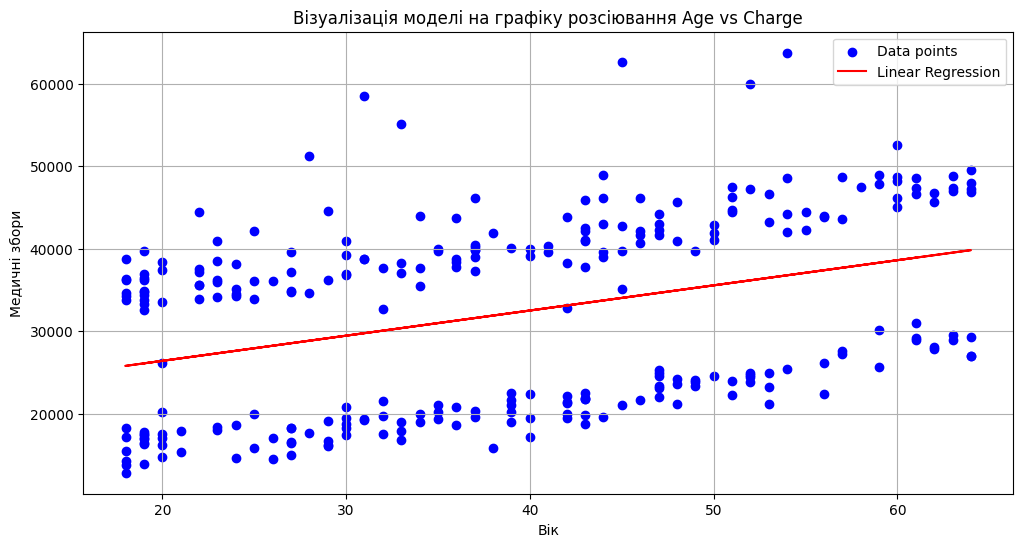

In [ ]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(smoker_age, smoker_target, color='blue', label='Data points')
plt.plot(smoker_age, smoker_predictions, color='red', label='Linear Regression')
plt.title('Візуалізація моделі на графіку розсіювання Age vs Charge')
plt.xlabel('Вік')
plt.ylabel('Медичні збори')
plt.legend()
plt.grid(True)

plt.show()

Значна частина точок знаходиться далеко від лінії регресії. Це свідчить про те, що модель погано пояснює більшу частину змін у даних.

Проведемо діагностику залишків.

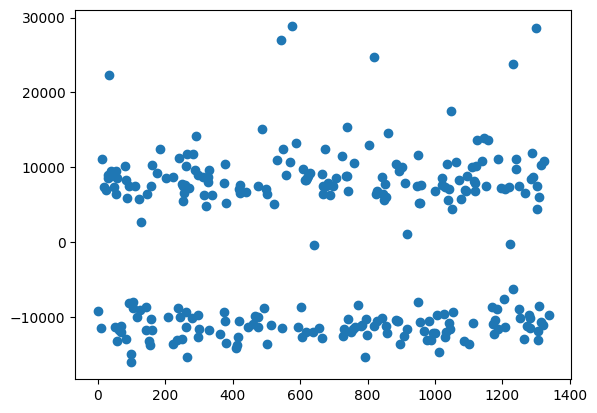

In [13]:
errors = smoker_target - smoker_predictions
plt.plot(errors, 'o');

На графіку залишки не виглядають гомоскедастичними, їх розкид не є сталим по всьому діапазону осі X.

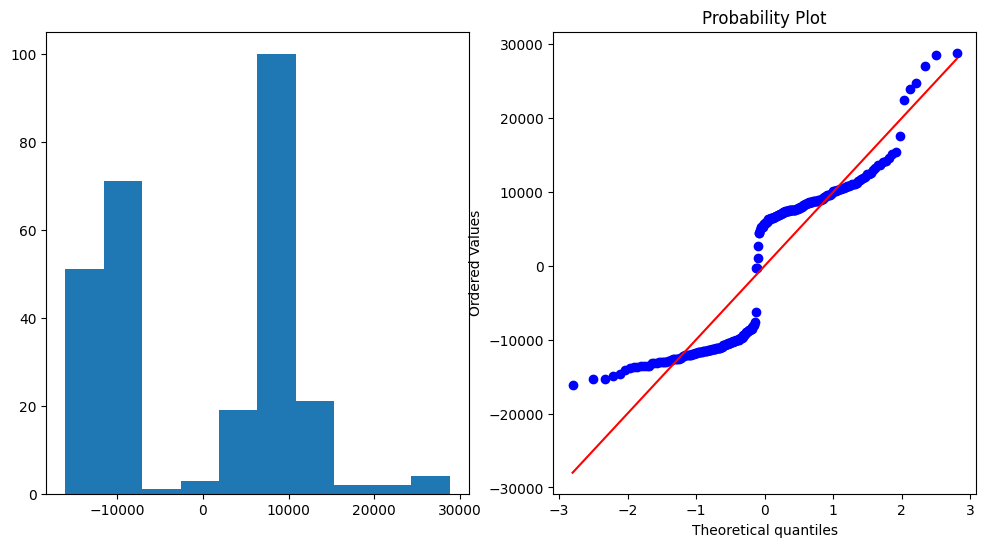

In [14]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);

Графіки показують, що розподіл залишків є бімодальним і значно відрізняється від нормального. Це порушує припущення про нормальність залишків, яке є важливим для лінійної регресії.

Висновок:


Лінійна регресія погано підходить для опису цих даних. Модель не є точною і має низький рівень пояснюваності. Використання лише віку для прогнозування медичних зборів не є доцільним. Варто включити до моделі більше релевантних ознак.